| **Inicio** | **atrás 16** | **Siguiente 18** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./16_Funciones.ipynb)| [⏩](./18_Dimensionality_Reduction_Algorithms.ipynb)|

# **17. Regression**

**Regresión Lineal:**

La regresión lineal es un método estadístico utilizado para modelar la relación lineal entre una variable dependiente $(y)$ y una o más variables independientes $(x_1, x_2, ..., x_n)$. El objetivo es encontrar la "mejor" línea recta que se ajuste a los datos. Aquí hay una explicación detallada:

**Terminología:**

1. **Variables:**

   - $(y)$: Variable dependiente (la que estamos tratando de predecir).
   - $(x_1, x_2, ..., x_n)$: Variables independientes o características.

2. **Hipótesis Lineal:**

 La relación entre $(y)$ e $(x)$ se modela como una combinación lineal de las características más un término de sesgo (intercepto).

   $h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

   - $h_\theta(x)$: Predicción para $(y)$ basada en las características $(x)$ y parámetros $(\theta)$.
   - $(\theta_0)$: Término de sesgo (intercepto).
   - $(\theta_1, \theta_2, ..., \theta_n)$: Parámetros (pendientes) que se deben ajustar durante el entrenamiento.

3. **Función de Costo (Error Cuadrático Medio):**

   $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$

   - $(m)$: Número de ejemplos en el conjunto de datos de entrenamiento.
   - $J(\theta)$: Función de costo que mide la diferencia entre las predicciones y los valores reales.

4. **Optimización:**

 El objetivo es minimizar la función de costo ajustando los parámetros $(\theta)$. Esto se puede hacer utilizando métodos como el descenso del gradiente.

**Ejemplo en Python:**

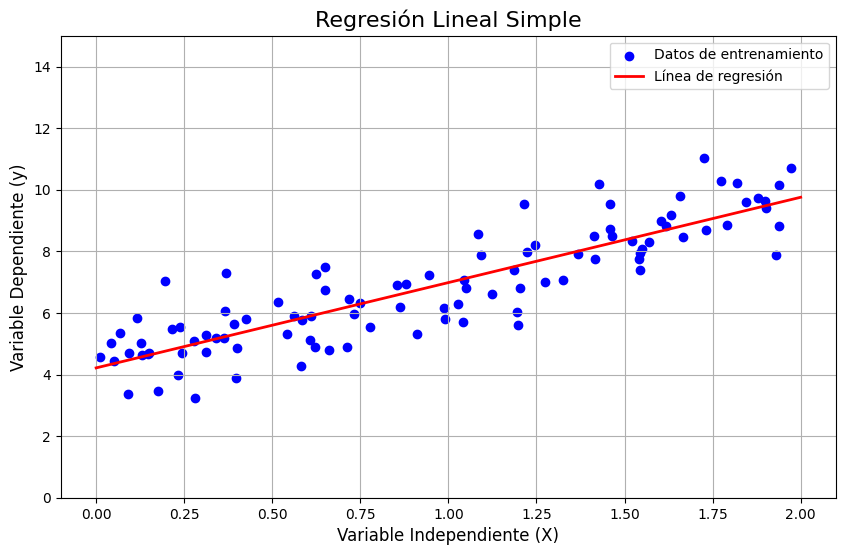

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Realizar predicciones
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

# Visualizar los datos y la línea de regresión con personalización
plt.figure(figsize=(10, 6))

# Scatter plot de datos de entrenamiento
plt.scatter(X, y, label='Datos de entrenamiento', color='blue', marker='o')

# Línea de regresión
plt.plot(X_new, y_pred, 'r-', label='Línea de regresión', linewidth=2)

# Añadir detalles de la gráfica
plt.title('Regresión Lineal Simple', fontsize=16)
plt.xlabel('Variable Independiente (X)', fontsize=12)
plt.ylabel('Variable Dependiente (y)', fontsize=12)
plt.legend()
plt.grid(True)  # Mostrar cuadrícula

# Ajustar límites del eje y para una mejor visualización
plt.ylim(0, 15)

# Mostrar la gráfica
plt.show()

En este ejemplo, se generan datos de ejemplo con una relación lineal y se utiliza la regresión lineal para ajustar una línea que se ajusta mejor a los datos. La línea de regresión se visualiza junto con los datos de entrenamiento.

**Regresión Logística:**

La regresión logística es un algoritmo de clasificación utilizado para predecir la probabilidad de que una instancia pertenezca a una categoría particular. Aunque el nombre incluye la palabra "regresión", se utiliza comúnmente para problemas de clasificación binaria (dos clases), aunque se puede extender a problemas de clasificación multiclase. Aquí hay una explicación detallada:

**Terminología:**

1. **Variable Dependiente (Objetivo):**

   - $(y)$: Variable dependiente, que es binaria (0 o 1 para clasificación binaria).

2. **Hipótesis Logística:**

   $h_\theta(x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n)}}$

   - $h_\theta(x)$: Probabilidad estimada de que $(y)$ sea 1, dado $(x)$ y parámetros $(\theta)$.
   - $(e)$: Base del logaritmo natural (Número de Euler).

3. **Función de Costo (Entropía Cruzada):**

   $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))]$

   - $(m)$: Número de ejemplos en el conjunto de datos de entrenamiento.
   - $(\log)$: Logaritmo natural.
   - $J(\theta)$: Función de costo que mide el error entre las predicciones y los valores reales.

4. **Optimización:**

 El objetivo es minimizar la función de costo ajustando los parámetros $(\theta)$. Esto se puede hacer utilizando métodos como el descenso del gradiente.

**Ejemplo en Python:**

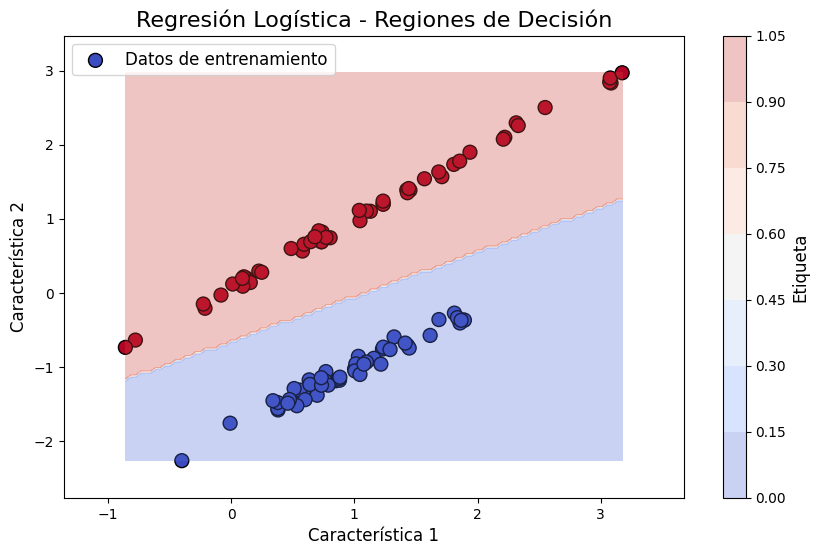

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X, y)

# Visualizar los datos y las regiones de decisión con personalización
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o', s=100, label='Datos de entrenamiento')

# Etiquetas de ejes
plt.xlabel('Característica 1', fontsize=12)
plt.ylabel('Característica 2', fontsize=12)

# Crear una cuadrícula para visualizar las regiones de decisión
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(points)
Z = Z.reshape(xx.shape)

# Visualizar las regiones de decisión
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

# Mostrar la leyenda
plt.legend(fontsize=12)

# Título de la gráfica
plt.title('Regresión Logística - Regiones de Decisión', fontsize=16)

# Añadir una barra de color para las etiquetas en el scatter plot
colorbar = plt.colorbar()
colorbar.set_label('Etiqueta', fontsize=12)

# Ajustar límites de la gráfica
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)

# Mostrar la gráfica
plt.show()

En este ejemplo, se generan datos de ejemplo con una relación no lineal y se utiliza la regresión logística para crear regiones de decisión que se ajusten a los datos de entrenamiento. La visualización incluye los datos de entrenamiento y las regiones de decisión estimadas.

**Regresión Polinómica:**

La regresión polinómica es una técnica de regresión que se utiliza cuando la relación entre la variable independiente $(x)$ y la variable dependiente $(y)$ no es lineal. En lugar de ajustar una línea recta, la regresión polinómica ajusta un polinomio de grado $(n)$ para describir la relación entre las variables. La fórmula general de la regresión polinómica es:

$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n + \varepsilon$

donde:

- $(y)$: Variable dependiente.
- $(x)$: Variable independiente.
- $(\beta_0, \beta_1, \ldots, \beta_n)$: Coeficientes a determinar durante el entrenamiento.
- $(n)$: Grado del polinomio.
- $(\varepsilon)$: Término de error.

La regresión polinómica puede expresarse de manera matricial como:

$Y = X \cdot \beta + \varepsilon$

donde:

- $(Y)$: Vector de respuestas (variable dependiente).
- $(X)$: Matriz de diseño que contiene $(x)$ y sus potencias hasta $(n)$.
- $(\beta)$: Vector de coeficientes a determinar.
- $(\varepsilon)$: Vector de errores.

**Ejemplo en Python:**

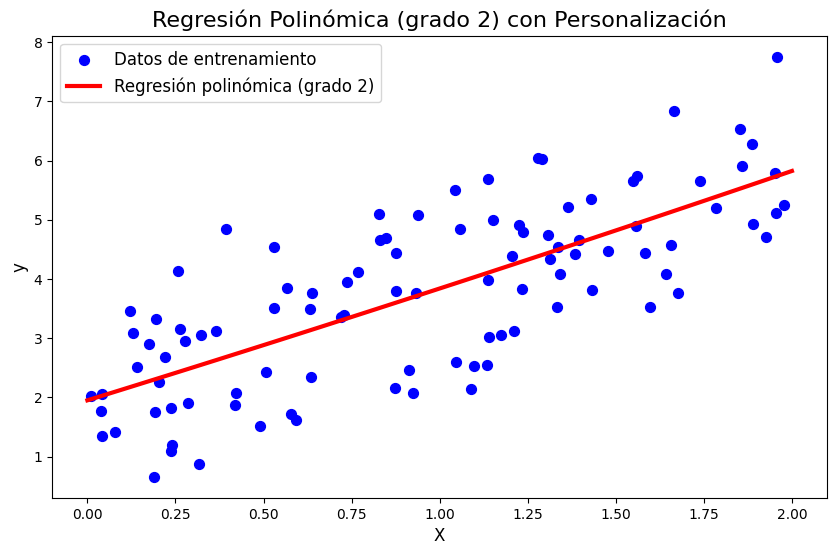

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Ajustar una regresión polinómica de grado 2
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Visualizar los datos y la regresión polinómica con personalización
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(X, y, label='Datos de entrenamiento', color='blue', marker='o', s=50)

# Línea de regresión polinómica
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
plt.plot(X_plot, model.predict(X_plot), color='red', linewidth=3, label=f'Regresión polinómica (grado {degree})')

# Etiquetas de ejes
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)

# Mostrar la leyenda
plt.legend(fontsize=12)

# Título de la gráfica
plt.title(f'Regresión Polinómica (grado {degree}) con Personalización', fontsize=16)

# Mostrar la gráfica
plt.show()

En este ejemplo, se generan datos de ejemplo que siguen una relación cuadrática y se ajusta una regresión polinómica de grado 2 utilizando la biblioteca scikit-learn. La visualización muestra los datos de entrenamiento y la regresión polinómica ajustada.

**Regresión Stepwise:**

La regresión stepwise es un enfoque iterativo para la selección de variables en un modelo de regresión, donde el objetivo es determinar qué variables predictoras deben incluirse o excluirse del modelo. Hay dos variantes principales: forward stepwise regression y backward stepwise regression.

1. **Forward Stepwise Regression:**

   - Comienza sin variables en el modelo.
   - Agrega secuencialmente las variables predictoras que más mejoran el rendimiento del modelo hasta que se cumple algún criterio de parada.

2. **Backward Stepwise Regression:**

   - Comienza con todas las variables en el modelo.
   - Elimina secuencialmente las variables predictoras que menos mejoran el rendimiento del modelo hasta que se cumple algún criterio de parada.

**Terminología:**

- **Criterio de Selección:**

 Es una métrica que se utiliza para evaluar el rendimiento del modelo y decidir qué variables agregar o eliminar. Puede ser el criterio de información de Akaike (AIC), el criterio de información bayesiano (BIC) u otros.

**Ejemplo en Python:**

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generar datos de ejemplo
np.random.seed(0)
X1 = np.random.rand(100)
X2 = 0.5 * X1 + np.random.rand(100)
y = 2 + 3 * X1 + 0.5 * X2 + np.random.randn(100)

# Crear un DataFrame con los datos
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Implementar backward stepwise regression
def backward_stepwise_regression(X, y):
    cols = list(X.columns)
    while len(cols) > 0:
        X_temp = X[cols]
        model = sm.OLS(y, sm.add_constant(X_temp)).fit()
        pvalues = model.pvalues.iloc[1:]
        max_pvalue = pvalues.max()
        if max_pvalue > 0.05:
            excluded_feature = pvalues.idxmax()
            cols.remove(excluded_feature)
        else:
            break
    return cols

# Seleccionar variables con backward stepwise regression
selected_features = backward_stepwise_regression(df[['X1', 'X2']], df['y'])
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: ['X1']


En este ejemplo, se generan datos de ejemplo con dos variables predictoras (X1 y X2) y una variable de respuesta (y). Luego, se implementa el enfoque de backward stepwise regression utilizando la biblioteca `statsmodels`. El resultado es la selección de variables que contribuyen significativamente al modelo. Este enfoque puede ajustarse según los criterios y requisitos específicos del problema.

**Regresión Ridge:**

La regresión Ridge es una técnica de regularización utilizada en modelos de regresión lineal para abordar el problema de la multicolinealidad y mejorar la estabilidad y la generalización del modelo. La técnica implica la adición de un término de penalización a la función de pérdida original, que penaliza los coeficientes de regresión grandes.

**Terminología:**

- **Regularización:** Es el proceso de agregar información adicional para prevenir el sobreajuste (overfitting) del modelo.
- **Hiperparámetro λ (lambda):** Parámetro que controla la fuerza de la penalización en la regresión Ridge. Su valor se ajusta durante el entrenamiento del modelo.

**Formula Matemática:**

La función de pérdida en la regresión Ridge se define como la suma de los errores al cuadrado más un término de penalización que es proporcional al cuadrado de los coeficientes de regresión:

$L(\beta) = \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^{p} \beta_j^2$

- $L(\beta)$: Función de pérdida.
- $( n )$: Número de observaciones.
- $( p )$: Número de características (variables predictoras).
- $( X_i )$: Vector de características para la observación $( i )$.
- $( \beta )$: Vector de coeficientes de regresión.
- $( \lambda )$: Parámetro de regularización.

La solución para minimizar esta función de pérdida se puede expresar de manera cerrada como:

$\beta = (X^T X + \lambda I)^{-1} X^T y$

- $( X^T )$: Transpuesta de la matriz de características.
- $( I )$: Matriz identidad.

**Ventajas de Ridge Regression:**

1. Mejora la estabilidad del modelo.
2. Útil cuando hay multicolinealidad entre las variables predictoras.
3. Controla el sobreajuste al penalizar los coeficientes grandes.

**Ejemplo en Python:**

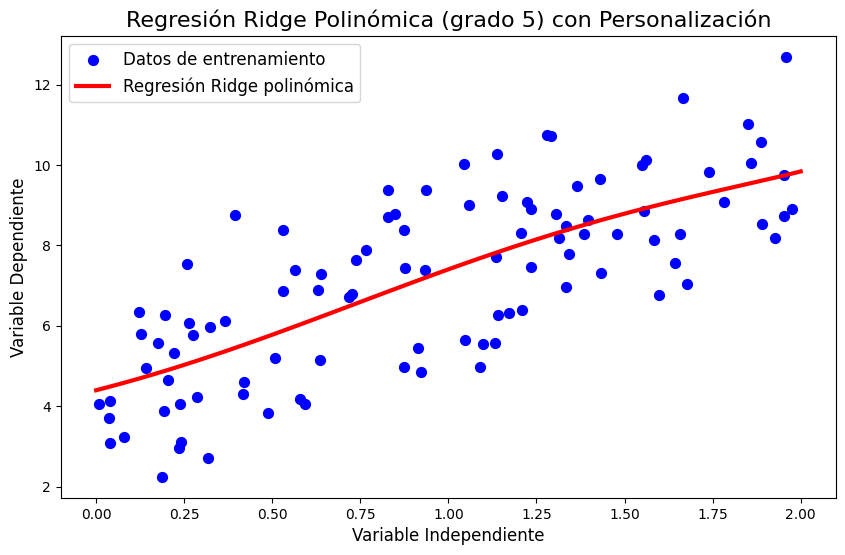

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * np.random.randn(100, 1)

# Ajustar un modelo de regresión Ridge polinómica
degree = 5
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
model.fit(X, y)

# Visualizar los resultados con personalización
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(X, y, label='Datos de entrenamiento', color='blue', marker='o', s=50)

# Línea de regresión Ridge polinómica
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_test)
plt.plot(X_test, y_pred, label='Regresión Ridge polinómica', color='red', linewidth=3)

# Etiquetas de ejes
plt.xlabel('Variable Independiente', fontsize=12)
plt.ylabel('Variable Dependiente', fontsize=12)

# Mostrar la leyenda
plt.legend(fontsize=12)

# Título de la gráfica
plt.title(f'Regresión Ridge Polinómica (grado {degree}) con Personalización', fontsize=16)

# Mostrar la gráfica
plt.show()

En este ejemplo, se genera un conjunto de datos de ejemplo y se ajusta un modelo de regresión Ridge polinómica de quinto grado utilizando scikit-learn. La regularización Ridge se aplica automáticamente al especificar el parámetro `alpha` en el modelo `Ridge`.

**Regresión Lasso (Least Absolute Shrinkage and Selection Operator):**

La regresión Lasso es otra técnica de regularización utilizada en modelos de regresión lineal para abordar el problema de la multicolinealidad y realizar selección de características (feature selection). Similar a la regresión Ridge, la regresión Lasso agrega un término de penalización a la función de pérdida, pero en lugar de penalizar los coeficientes al cuadrado, utiliza el valor absoluto de los coeficientes.

**Terminología:**

- **Regularización:** Proceso de agregar información adicional para prevenir el sobreajuste del modelo.
- **Hiperparámetro $( \alpha )$ (alfa):** Parámetro que controla la fuerza de la penalización en la regresión Lasso.

**Formula Matemática:**

La función de pérdida en la regresión Lasso se define como la suma de los errores al cuadrado más un término de penalización que es proporcional al valor absoluto de los coeficientes de regresión:

$L(\beta) = \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^{p} |\beta_j|$

- $L(\beta)$: Función de pérdida.
- $( n )$: Número de observaciones.
- $( p )$: Número de características (variables predictoras).
- $( X_i )$: Vector de características para la observación $( i )$.
- $( \beta )$: Vector de coeficientes de regresión.
- $( \alpha )$: Parámetro de regularización.

La solución para minimizar esta función de pérdida se puede expresar como:

$\beta = \text{arg min}_{\beta} \left\{ \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^{p} |\beta_j| \right\}$

**Ventajas de Lasso Regression:**

1. Realiza selección de características al forzar algunos coeficientes a cero.
2. Útil cuando se sospecha que algunas características no son relevantes para la predicción.

**Ejemplo en Python:**

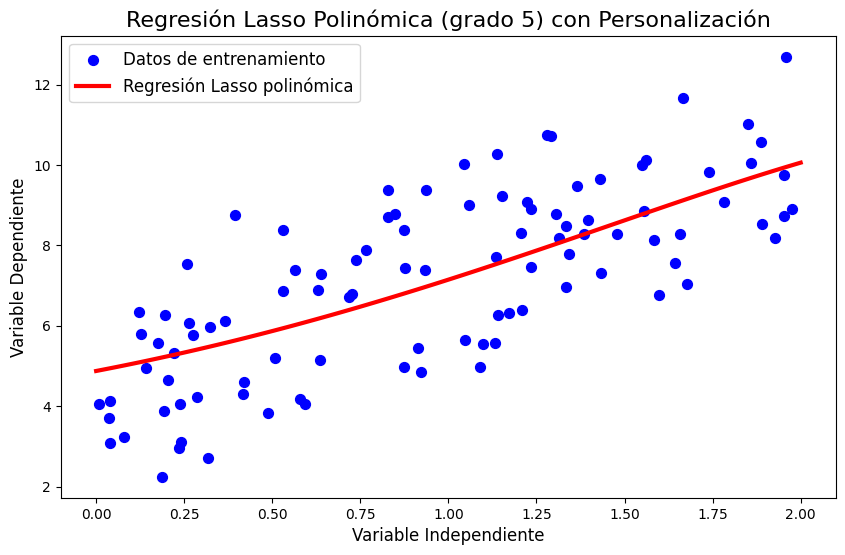

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * np.random.randn(100, 1)

# Ajustar un modelo de regresión Lasso polinómica
degree = 5
model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))
model.fit(X, y)

# Visualizar los resultados con personalización
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(X, y, label='Datos de entrenamiento', color='blue', marker='o', s=50)

# Línea de regresión Lasso polinómica
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_test)
plt.plot(X_test, y_pred, label='Regresión Lasso polinómica', color='red', linewidth=3)

# Etiquetas de ejes
plt.xlabel('Variable Independiente', fontsize=12)
plt.ylabel('Variable Dependiente', fontsize=12)

# Mostrar la leyenda
plt.legend(fontsize=12)

# Título de la gráfica
plt.title(f'Regresión Lasso Polinómica (grado {degree}) con Personalización', fontsize=16)

# Mostrar la gráfica
plt.show()

En este ejemplo, se genera un conjunto de datos de ejemplo y se ajusta un modelo de regresión Lasso polinómica de quinto grado utilizando scikit-learn. La regularización Lasso se aplica automáticamente al especificar el parámetro `alpha` en el modelo `Lasso`. La visualización muestra cómo Lasso puede llevar algunos coeficientes a cero, logrando así la selección de características.

**Regresión Elastic Net:**

La regresión Elastic Net es una técnica de regularización que combina las penalizaciones de la regresión Lasso y Ridge. Al igual que en la regresión Lasso y Ridge, el objetivo es prevenir el sobreajuste y realizar selección de características al agregar términos de penalización a la función de pérdida.

**Terminología:**

- **Regularización:** Proceso de agregar información adicional para prevenir el sobreajuste del modelo.
- **Hiperparámetro $( \alpha )$ (alfa):** Parámetro que controla la fuerza de la penalización elástica.
- **Hiperparámetro $( \rho )$ (rho):** Proporción que controla la mezcla entre las penalizaciones de Lasso y Ridge.

**Formula Matemática:**

La función de pérdida en la regresión Elastic Net se define como:

$L(\beta) = \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \left( \rho \sum_{j=1}^{p} |\beta_j| + \frac{1}{2} (1-\rho) \sum_{j=1}^{p} \beta_j^2 \right)$

- $L(\beta)$: Función de pérdida.
- $( n )$: Número de observaciones.
- $( p )$: Número de características (variables predictoras).
- $( X_i )$: Vector de características para la observación $( i )$.
- $( \beta )$: Vector de coeficientes de regresión.
- $( \alpha )$: Parámetro de regularización.
- $( \rho )$: Proporción entre las penalizaciones de Lasso y Ridge.

La solución para minimizar esta función de pérdida se puede expresar como:

$\beta = \text{arg min}_{\beta} \left\{ \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \left( \rho \sum_{j=1}^{p} |\beta_j| + \frac{1}{2} (1-\rho) \sum_{j=1}^{p} \beta_j^2 \right) \right\}$

**Ventajas de Elastic Net Regression:**

1. Combina las ventajas de Lasso y Ridge, permitiendo selección de características y manejo de multicolinealidad.
2. Útil cuando se tiene un gran número de características y algunas de ellas están altamente correlacionadas.

**Ejemplo en Python:**

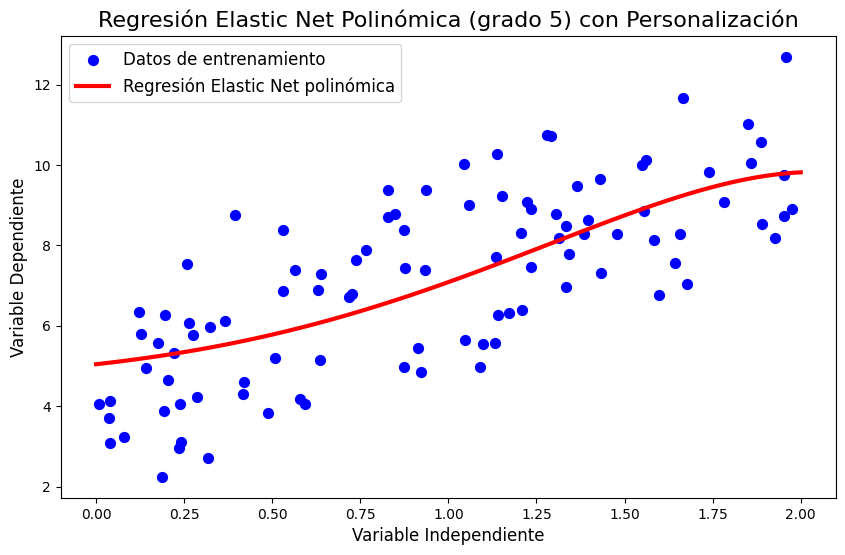

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * np.random.randn(100, 1)

# Ajustar un modelo de regresión Elastic Net polinómica
degree = 5
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=0.1, l1_ratio=0.5))
model.fit(X, y)

# Visualizar los resultados con personalización
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(X, y, label='Datos de entrenamiento', color='blue', marker='o', s=50)

# Línea de regresión Elastic Net polinómica
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_test)
plt.plot(X_test, y_pred, label='Regresión Elastic Net polinómica', color='red', linewidth=3)

# Etiquetas de ejes
plt.xlabel('Variable Independiente', fontsize=12)
plt.ylabel('Variable Dependiente', fontsize=12)

# Mostrar la leyenda
plt.legend(fontsize=12)

# Título de la gráfica
plt.title(f'Regresión Elastic Net Polinómica (grado {degree}) con Personalización', fontsize=16)

# Mostrar la gráfica
plt.show()

En este ejemplo, se genera un conjunto de datos de ejemplo y se ajusta un modelo de regresión Elastic Net polinómica de quinto grado utilizando scikit-learn. La regularización Elastic Net se aplica automáticamente al especificar los parámetros `alpha` y `l1_ratio` en el modelo `ElasticNet`. La visualización muestra cómo Elastic Net combina las penalizaciones de Lasso y Ridge.

| **Inicio** | **atrás 16** | **Siguiente 18** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./16_Funciones.ipynb)| [⏩](./18_Dimensionality_Reduction_Algorithms.ipynb)|